# INFO 204 Lab 2 - Data Manipulation & Plotting

In this lab, we will be using NumPy to manipulate arrays and datasets, the [Matplotlib](https://matplotlib.org/) plotting utilities to do some useful graphs, and also make some fun probabilistic explorations.

Throughout the lab, there are a number of required tasks, each labelled as **Task X**. Your goal for this lab is to complete these sections and then upload the completed notebook to Blackboard before the due date.

Please ensure that the following libraries are installed: numpy, matplotlib, seaborn, scikit-learn 

## A. Arrays 

Arrays will form an important part of machine learning in Python, as most of the machine learning methods will learn from data presented in arrays. Array manipulation is similar to that of list manipulation that we covered in Lab 1. For a start, import numpy:

In [8]:
import numpy as np ## the "as np" allows us to refer to the library through the short name 'np' rather than 'numpy'

Now we define a array "v":

In [9]:
v = np.array([1,2,-1,-1])

We can access array elements by their indeces, just like using a Python List:

In [10]:
v[1]         # 2nd element

2

In [11]:
v[-1]        # last element, same as in standard Python

-1

Some simple operations on the array are straightforward:

In [12]:
np.sum(v)

1

In [13]:
v + 2

array([3, 4, 1, 1])

In [14]:
v * 2

array([ 2,  4, -2, -2])

As you see the manipulation of arrays is quite easy in NumPy. 
How about this multiplication operation between v and a new array x:

In [15]:
x = np.array([1,1,-1,-1])

In [16]:
x * v      #element-wise product

array([1, 2, 1, 1])

and of course, we can chain these operations together:

In [17]:
np.sum(x * v)      

5

Indeed, the last operation gives us the _dot product_ of the two vectors $\mathbf{x}$ and $\mathbf{v}$, i.e., $\mathbf{x}^T\mathbf{v}$.  This is such a common operator in many processes that in NumPy, this is implemented by the dedicated dot() function (see if it gives the same outcome as above):

In [18]:
np.dot(x,v)

5

Next, let us generate a 2D array (with 2 rows x 3 colums) using a random number generator and try out some simple operations:

In [19]:
a = np.random.default_rng().random((2,3))

In [20]:
print(a)       # check out the content of "a"

[[0.85344781 0.08165936 0.10545762]
 [0.40934773 0.67758641 0.93823411]]


If you've been given an array, and need to know its dimensions, you can find these out through the array's shape property:

In [21]:
print(a.shape)

(2, 3)


Simple operations such as +,-,*,/ can be easily carrried out across all elements, e.g.

In [22]:
print(a + 5)

[[5.85344781 5.08165936 5.10545762]
 [5.40934773 5.67758641 5.93823411]]


Now that we have a 2-D array, we can do operation on one axis or the other, e.g., a vertical addition:

In [23]:
print(np.sum(a, axis=0))

[1.26279554 0.75924577 1.04369173]


and a horizontal addition (column-wise):

In [24]:
print(np.sum(a, axis=1))

[1.04056479 2.02516825]


How do we access rows or columns of an 2-D array? Try these -

In [25]:
# first row, or simply "a[0]""
print(a[0,:])

[0.85344781 0.08165936 0.10545762]


In [26]:
# first column
print(a[:,0])

[0.85344781 0.40934773]


In [27]:
# mean value of the first column
print(np.mean(a[:,0]))

0.6313977699800222


**<span style="color: red">Task 1:</span>** Find out what numpy's [hstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html#numpy.hstack), 
[vstack()](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) 
or [c_[]](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) does. Put variable a's 1st and 3rd columns into a new 2-D array:

In [28]:
# your code here
b= np.array([8, 3, 1])
np.vstack((a,b))

print(a)
x= np.vstack((a[:,0],(a[:,2])))
print(x)

[[0.85344781 0.08165936 0.10545762]
 [0.40934773 0.67758641 0.93823411]]
[[0.85344781 0.40934773]
 [0.10545762 0.93823411]]


## B. Dealing with datasets

Now we are ready to play with a dataset and put our array manipulation skills into good use. First, we load in a Scikit-Learn dataset related to the well-known "California Housing" regression problem. This dataset has instances that describe median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [29]:
from sklearn import datasets
calif = datasets.fetch_california_housing()

We can check out some information about the dataset:

In [30]:
print("Keys of calif: {}".format(calif.keys()))
print("Feature names: {}".format(calif.feature_names))
print("Shape of data: {}".format(calif.data.shape))

Keys of calif: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of data: (20640, 8)


We now extract the data and target separately and assign them to "X" and "y". This X-y notation is frequently encountered in machine learning and will be adopted for most of our future labs. 

In [31]:
X = calif.data
y = calif.target

In [32]:
# check out the shapes - see if they match with the dataset report above. 
X.shape, y.shape

((20640, 8), (20640,))

The 'feature_names' information extracted from the dataset does not seem to be very informative, even though we may be able to guess out the meaning of a few attributes. You can find more description of the dataset [here](https://www.kaggle.com/datasets/camnugent/california-housing-prices). Note our target value is "MedHouseVal". 

A popular way of handling datasets is using Pandas' DataFrame. The following code imports the pandas package and generate a DataFrame from the data we've got - note we use Numpy's "c_[]" utility to attach the target labels to the feature data X, merging them into one spreadsheet:

In [33]:
import pandas as pd
df = pd.DataFrame(data=np.c_[X, y], columns=calif['feature_names'] + ['MedHouseVal'])

Now, let's take a look of the head of the dataframe - it's nicely (re)presented:

In [34]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


To locate data in a data frame, use row and column information:

In [35]:
df.iloc[2]['HouseAge'] ## extracts the "House Age" column of the third row

52.0

Or, extract an attribute's values for a row range, as an array - compare the output with the dataframe head displayed above - note the use of *.values*:

In [36]:
print(df.iloc[1:4]['HouseAge'].values) ## extracts the "House Age" column of the second to fourth rows of the data set

[21. 52. 52.]


You can issue queries on the dataframe, e.g., finding all entries with a HouseAge value not greater than 10:

In [37]:
df[df['HouseAge'] <= 10.0]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29,0.600
87,0.7600,10.0,2.651515,1.054545,546.0,1.654545,37.81,-122.27,1.625
88,0.9722,10.0,2.692308,1.076923,125.0,3.205128,37.80,-122.27,1.375
437,2.1705,10.0,5.030000,1.180000,228.0,2.280000,37.87,-122.30,1.500
570,7.6110,5.0,6.855776,1.061442,7427.0,2.732524,37.72,-122.24,3.507
...,...,...,...,...,...,...,...,...,...
20570,3.2222,6.0,4.821429,1.032468,894.0,2.902597,38.54,-121.96,1.396
20571,3.4186,6.0,5.662562,1.027094,2561.0,3.153941,38.53,-121.99,1.273
20574,1.9327,10.0,5.789474,1.078947,898.0,3.938596,38.57,-121.92,1.938
20588,2.0474,5.0,4.378132,1.113895,938.0,2.136674,39.15,-121.59,0.613


**<span style='color:red'>Task 2:</span>** Find out the average house age value for all entries with at least 6.0 rooms (on average).

In [38]:
# your code here
df1 = df[df['AveRooms'] >= 6.0]
print(df1['HouseAge'].mean())

24.0062649714391


## C. Plotting

It's time for us to do some plotting. To do this we need to import the Matplotlib/pyplot package:

In [39]:
import matplotlib.pyplot as plt ## like with numpy, the 'as plt' provides us with the short alias for the library

We can display the average occupancy (AveOccup) column as a sequence (i.e. average occupancy across the 20K+ districts; this doesn't make much sense but serves an example):

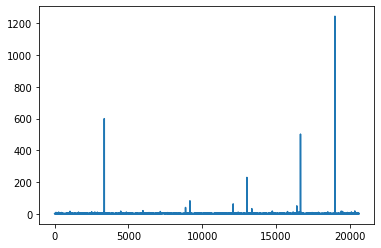

In [40]:
plt.plot(df['AveOccup']); ## note the semicolon at the end of the statement - it prevents the return value of the plot function from being printed (try removing it and see what happens)

We can also choose two columns (i.e. attributes) and do a **scatter plot**. In this case we choose the first and last attributes (i.e., median income and median house value), and plot the coordinates using a blue dot:

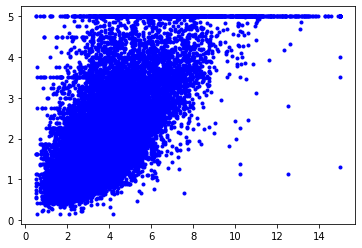

In [41]:
plt.plot(df['MedInc'], df['MedHouseVal'], 'b.');

We can use the "hist" function to generate a histogram, e.g. of the target values. The number of bins is specified as 25, and with the "density" parameter set the histogram frequencies are normalized - the bar heights now add to 1. 

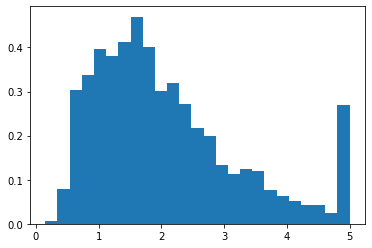

In [42]:
plt.hist(df['MedHouseVal'], bins=25, density=True);

Or use seaborn's "displot", with a smooth density estimation displayed:

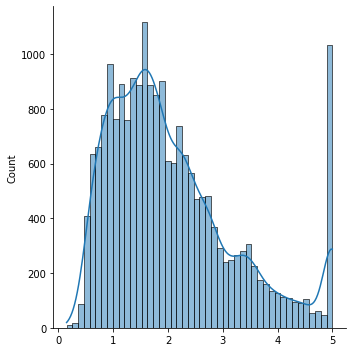

In [43]:
import seaborn as sb
sb.displot(y, kde=True);

**<span style='color: red'>Task 3:</span>** Plot the histogram for the median household income attribute values. 

(array([ 213., 1022., 2353., 2955., 3140., 2772., 2391., 1747., 1297.,
         881.,  590.,  315.,  292.,  195.,   96.,   51.,   91.,   71.,
          37.,   21.,   22.,   15.,   14.,    5.,   54.]),
 array([ 0.4999  ,  1.079908,  1.659916,  2.239924,  2.819932,  3.39994 ,
         3.979948,  4.559956,  5.139964,  5.719972,  6.29998 ,  6.879988,
         7.459996,  8.040004,  8.620012,  9.20002 ,  9.780028, 10.360036,
        10.940044, 11.520052, 12.10006 , 12.680068, 13.260076, 13.840084,
        14.420092, 15.0001  ]),
 <BarContainer object of 25 artists>)

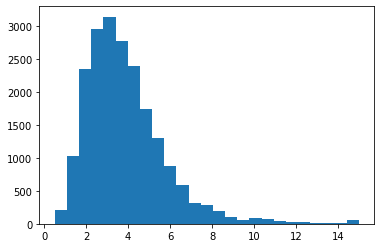

In [44]:
# Your code here....
plt.hist(df['MedInc'], bins=25,     )

You should notice that the distribution of the MedInc variable is skewed. Many modelling methods and analyses assume that data is normally distributed (or at least close to normal). Often, skewed data is better modelled through a _log transform_.

**<span style='color: red'>Task 4:</span>** Plot the histogram for the MedInc attribute values _after_ applying a log transform on the values (NumPy provides a [log()](https://numpy.org/doc/stable/reference/generated/numpy.log.html) function that simplifies this process)

(array([8.19030217e-03, 3.56100094e-04, 6.40980170e-03, 1.24635033e-02,
        2.59953069e-02, 3.59661095e-02, 7.08639188e-02, 1.18581331e-01,
        2.13660057e-01, 3.07314382e-01, 4.66491124e-01, 5.57652748e-01,
        6.92970784e-01, 8.55352427e-01, 8.67815930e-01, 8.69952531e-01,
        7.00804986e-01, 6.02877460e-01, 3.99544306e-01, 2.21494259e-01,
        1.49205940e-01, 5.59077148e-02, 6.26736166e-02, 1.95855052e-02,
        2.77758074e-02]),
 array([-0.6933472 , -0.55729104, -0.42123488, -0.28517871, -0.14912255,
        -0.01306639,  0.12298978,  0.25904594,  0.3951021 ,  0.53115826,
         0.66721443,  0.80327059,  0.93932675,  1.07538291,  1.21143908,
         1.34749524,  1.4835514 ,  1.61960757,  1.75566373,  1.89171989,
         2.02777605,  2.16383222,  2.29988838,  2.43594454,  2.57200071,
         2.70805687]),
 <BarContainer object of 25 artists>)

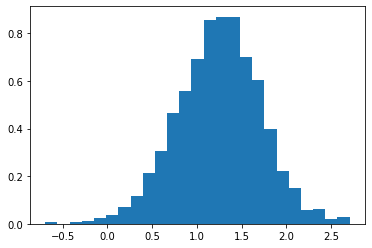

In [45]:
# Your code here....


plt.hist(np.log(df['MedInc']), bins = 25,density=True)

If done correctly, then the resulting histogram should look more like the "bell curve" expected from a normal distribution.

Seaborn can some other nice plots. E.g., here's the correlation matrix of all attributes (including target) shown as a heatmap:

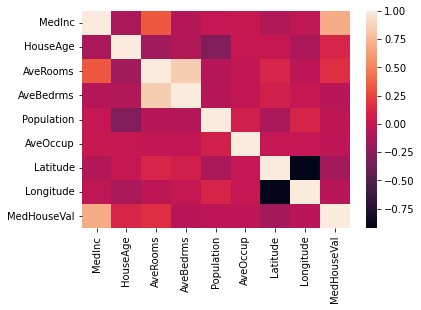

In [46]:
sb.heatmap(df.corr());

**<span style='color: red'>Task 5:</span>** From the correlation heatmap shown above, which attribute/feature has the largest correlation with the "MedHouseVal" value (Tip: check colors on the last column)? Does it make sense? 

Your answer (click this cell and type in): 

- people with higher median income will purchase more expensive homes so the med house value will increase once the median income is higher.

## D. Probabilistic expoloration

The last part of the lab is related to the concept of probability and probability distributions. 

### Tom's Breakfast

Tom has difficulty in deciding what to eat for breakfast each morning, so he decides to follow some *random* rules:
1. If it's a fine day, he'll toss a $2 coin: heads for eggs, tails for muesli.
2. otherwise, if it's a rainy day, he'll toss a $1 coin: head for eggs, tails for muesli.
It turns out that neither the $2 or $1 coins are fair (i.e., the chance of a head does not equal the change of a tail). The probability of the $2 coin toss returning a head is 0.7, and the probability of a head from the $1 coin toss is 0.4.

Assume that the probability of a fine day is 0.6

Tom wants to know what is the probability that he'll have eggs on any given day - we could work this out analytically (and should find that the probability is 0.58), but Tom wants to estimate the probability through _simulation_. This can be done using a random number generator in the following manner:
1. Start with an empty list
2. Generate a random number between 0 and 1 - if the number is below 0.6 then the day is "fine"
3. If the day is fine, then generate another random number between 0 and 1 - if the number is below 0.7 then append a 1 to the list, otherwise append a 0
4. If the day is rainy, then generate another random number between 0 and 1 - if the number is below 0.4 then append a 1 to the list, otherwise append a 0
5. Repeat steps 2-4 for a given number of days (e.g., 100)
6. Compute the mean of the list

In the above algorithm, appending a 1 to the list equates to "eggs for breakfast" and appending a 0 equates to "muesli for breakfast". Therefore, the mean of the list is an estimate of the probability of eggs for any given day.

**<span style='color:red'>Task 6:</span>** Write a few Python lines that generates breakfast picks for Tom, over 100 days; count the number of eggs days. Do the same for 1000 days and then again for 10000 days.
Tips: to make it simple, use an array (list) to store the choices, 1 for eggs, 0 for muesli. Also the NumPy [uniform()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) function will be a huge help here!

In [47]:
# Your code here
import random
import statistics
a = []

for x in range(100):
    if (random.random() <=0.6):
        if (random.random() <=0.7):
            a.append(1)
        else:
            a.append(0)
        
    else:
        if (random.random() <= 0.4):
            a.append(1)
        else:
            a.append(0)
        

print(statistics.mean(a))


0.57


Run your code for a couple of times, and comment on your findings:

- Write your comments here...

### Central Limit Theorem
If you have 4 rolls of a dice and get 1, 3, 2, 4, then the mean is $(1+3+2+4)/4=2.5$. How about we generate more rolls samples, and see how the sample means are distributed? 

**<span style='color: red'>Task 7a:</span>** Generate 1000 dice rolls. Find out the mean result. Hint: recall the [integers()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html) function from the previous lab!

In [66]:
# your code here
j =[]

rng = np.random.default_rng()
z = statistics.mean(rng.integers(1001, size = 1000))
print(z)


505


**<span style='color: red'>Task 7b:</span>** Repeat Step 1 for 1000 times, plot a histogram for all mean values. 

(array([  1.,   2.,   1.,   8.,  15.,  31.,  34.,  35.,  75.,  79.,  94.,
        129., 100., 120.,  59.,  67.,  63.,  30.,  25.,  15.,   8.,   6.,
          2.,   0.,   1.]),
 array([471.  , 473.36, 475.72, 478.08, 480.44, 482.8 , 485.16, 487.52,
        489.88, 492.24, 494.6 , 496.96, 499.32, 501.68, 504.04, 506.4 ,
        508.76, 511.12, 513.48, 515.84, 518.2 , 520.56, 522.92, 525.28,
        527.64, 530.  ]),
 <BarContainer object of 25 artists>)

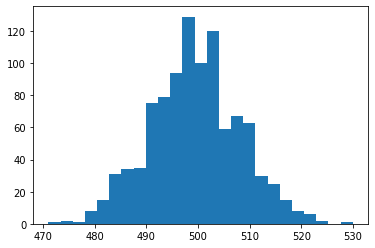

In [67]:
# your code here
j =[]
for x in range(1000):
    j.append(statistics.mean(rng.integers(1001, size = 1000)))

plt.hist(j, bins = 25)

The [Central Limit Theorem](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html) states that for independent and identically distributed (i.i.d) samples, the distribution of the sample means will be normally distributed. Do these results look normally distributed to you?

######  End of Lab 2.
Please remember to rename your completed notebook and submit it via Blackboard. 